# Skilaverkefni08. Stærð- og Reiknifræði REI201G
### Donn Eunice Bartido deb5@hi.is 
mars 2023


## 27. Körfuboltamenn
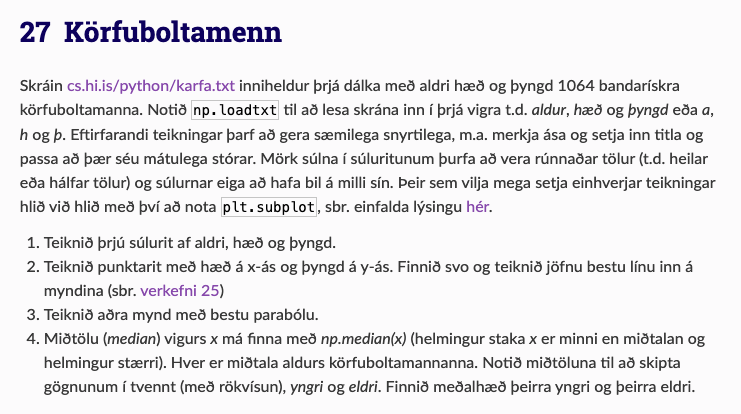

## Lausn 27.1

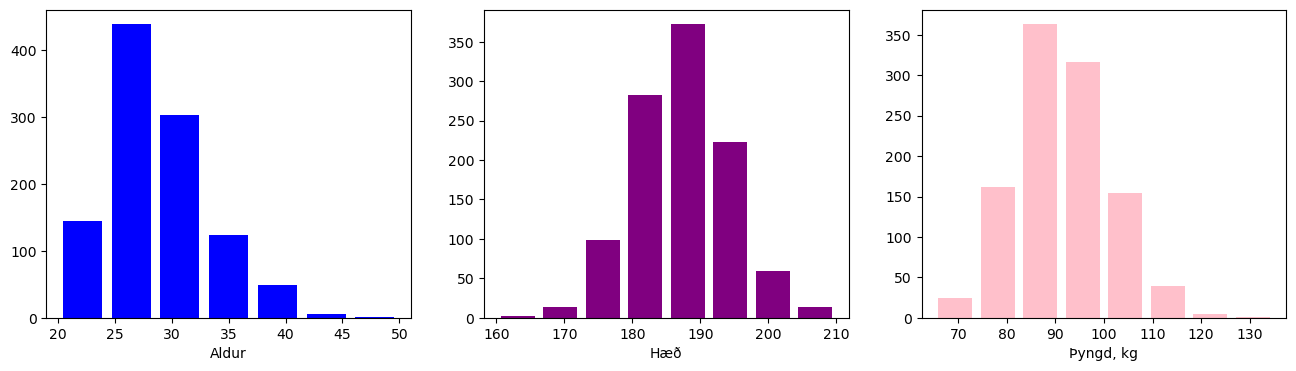

In [18]:
import numpy as np, numpy.linalg as la
import matplotlib.pyplot as plt

# Hlaða inn gögnum í breytur age, height og weight frá textaskrá sem er geymd á vefsíðu
(age, height, weight) = np.loadtxt("https://cs.hi.is/python/karfa.txt").T

# Lengd vigursins age er reiknuð
length = np.arange(len(age))

# Breiddin á hverjum stafli í staflgröfunum er sett sem barWidth=0.01.
barWidth = 0.01

# Súluritið 

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(age, rwidth=0.8, bins=7, range=(20,50), color='b')
plt.xlabel('Aldur')

plt.subplot(1,3,2)
plt.hist(height, rwidth=0.8, bins=8, range=(160,210), color='purple')
plt.xlabel('Hæð')

plt.subplot(1,3,3)
plt.hist(weight, rwidth=0.8, bins=8, range=(65,135), color='pink') 
plt.xlabel('Þyngd, kg')
plt.show()


## Lasun 27.2

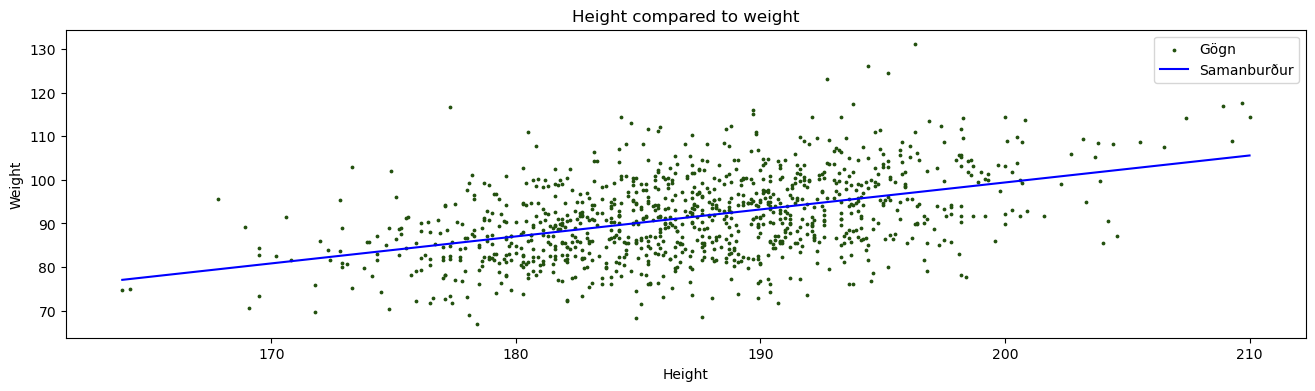

In [19]:

# Notkun np.polyfit() til að finna bestu línulegu og öðru stigs margliður sem lýsa sambandi milli hæðar og þyngdar.
(a, b) = np.polyfit(height, weight, deg=1)
(A,B,C)= np.polyfit(height, weight, deg=2)

# Búum til vigur xp sem inniheldur jafnt dreifðar tölur frá minsta hæð til hæsta hæð í gögnunum.
xp = np.linspace(min(height), max(height))

# Reiknum gildi y fyrir bestu línulegu margliðuna sem lýsir sambandi milli hæðar og þyngdar.
yp = a*xp + b
yp1 = A*xp**2+B*xp+C

# Scatter plott af gögnunum sem spretthýði
# Plottum svo bestu línulegu margliðuna sem línulegt rautt línulit
# Bætum við lýsingu á x og y ás með xlabel og ylabel
# Setjum titil á graf með title()
# Bætum við lýsingu á línunni með legend()
# Sýnum myndina með plt.show()


plt.figure(figsize=(16,4))
plt.scatter(height, weight, c='#23510F', s=3, label="Gögn")
plt.plot(xp, yp, c='b', label='Samanburður')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height compared to weight")
plt.legend()
plt.show()

## Lasun 27.3


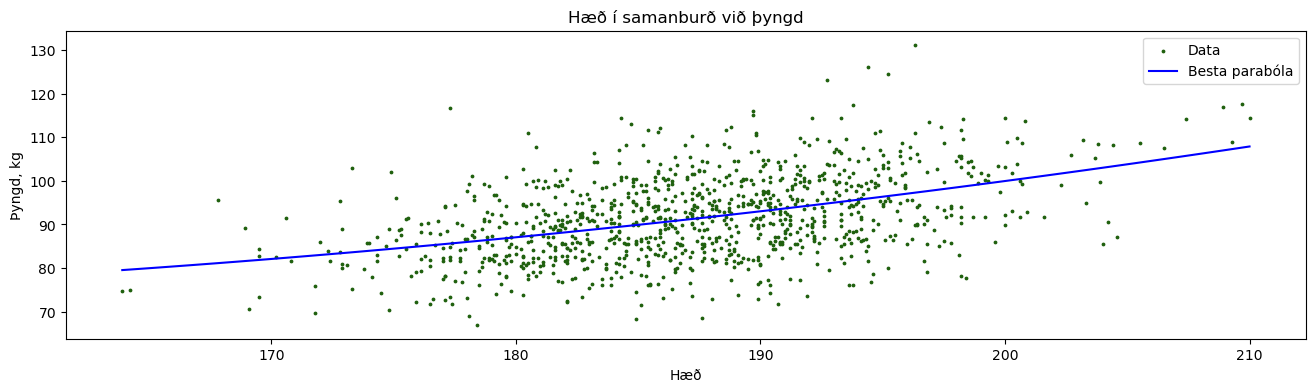

In [20]:
# Teiknum scatter plot af gögnunum sem spretthýði með scatter() fallinu og bestu öðru stigs margliðuna sem línulit með plot() fallinu.
plt.figure(figsize=(16,4))
plt.scatter(height, weight, c='#20610F', s=3, label='Data')
plt.plot(xp, yp1, c='b', label='Besta parabóla')

# Bætum við lýsingum á x og y ás með xlabel og ylabel
plt.xlabel('Hæð')
plt.ylabel('Þyngd, kg')

# Setjum titil á graf með title()
plt.title("Hæð í samanburð við þyngd")

# Bætum við lýsingu á línunni með legend()
plt.legend()

# Sýnum myndina með plt.show()
plt.show()

## Lausn 27.4 

In [21]:
# Skilgreinum fallið findmedian() sem tekur inn þrjár breytur a, b og c.
# Fallið notar for-lykkju til að finna allar hæðir sem tilheyra öldrunum yngri en c eða eldri en c.
# Fallið skilar meðalhæð yngri og meðalhæð eldri með np.mean() fallinu sem reiknar meðaltal.

def findmedian(a, b, c):
    eldri = []
    yngri = []
    for i,j in enumerate(a):
        if j <= c:
            yngri.append(b[i])
        if j > c:
            eldri.append(b[i])
    return np.mean(eldri), np.mean(yngri)

# Breyturnar a og b eru fyrir meðalhæðina yngri og meðalhæðina eldri.
a, b = findmedian(age, height, np.median(age))

# Niðurstöðurnar eru prentaðar með print() fallinu.
print("Miðtala er =", round(np.median(age),2))
print("Meðalhæð yngri er =", round(a,2))
print("Meðalhæð eldri er =", round(b,2))


Miðtala er = 27.98
Meðalhæð yngri er = 186.67
Meðalhæð eldri er = 187.74


# 34.Mannfjöldaspá fyrir Ísland 


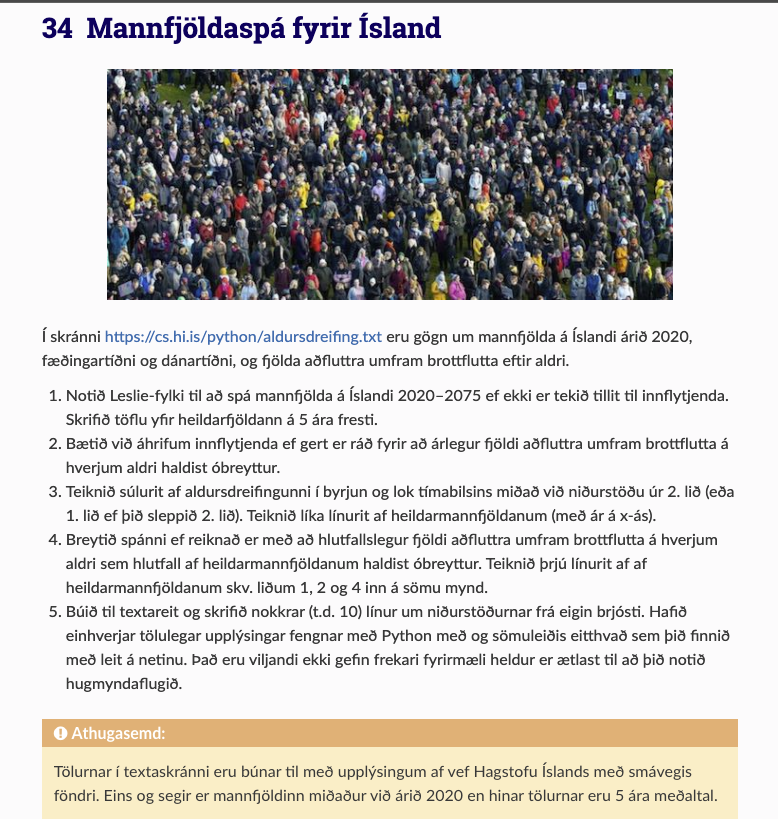

## Lausn 34.1


In [9]:
A = np.loadtxt("https://cs.hi.is/python/aldursdreifing.txt", skiprows=1, dtype='float', delimiter="\t").T
age = A[0].astype(int)
number = A[1].astype(int)
deathRate = A[2].astype(float)
birthRate = A[3].astype(float)
immigrantsOverEmigrants = A[4].astype(int)

n = deathRate.shape[0]

def Leslie(f,p):
    matrix = np.zeros((n,n))
    matrix[0] = f
    for i in range(n-1):
        matrix[i+1,i] = 1-p[i]
    return(matrix)

fylki = Leslie(birthRate, deathRate)
list4matplot0 = []
print('Ár\tFjöldi')
for i in range(0, 56):
    summa = la.matrix_power(fylki, i) @ number
    list4matplot0.append(summa.sum())
    if i%5==0:
        print(str(i+2020).ljust(7), int(summa.sum()))


Ár	Fjöldi
2020    366517
2025    376516
2030    383912
2035    387681
2040    388190
2045    386031
2050    381831
2055    376259
2060    369496
2065    361280
2070    351467
2075    340356


## Lausn 34.2

In [10]:
def totalsum(year,amount):
    for i in range(year):
        amount = fylki@amount+immigrantsOverEmigrants
    return amount
totalim = immigrantsOverEmigrants/number.sum()

list4matplot = []

print('Ár\tFjöldi')
for i in range(0, 56):
    summa1 = sum(totalsum(i,number))
    list4matplot.append(summa1)
    if i%5==0:
        print(str(i+2020).ljust(7), int(summa1.sum()))

Ár	Fjöldi
2020    366517
2025    403853
2030    441835
2035    478872
2040    514289
2045    547839
2050    579758
2055    610728
2060    640991
2065    669937
2070    696624
2075    720461


## Lausn 34.3

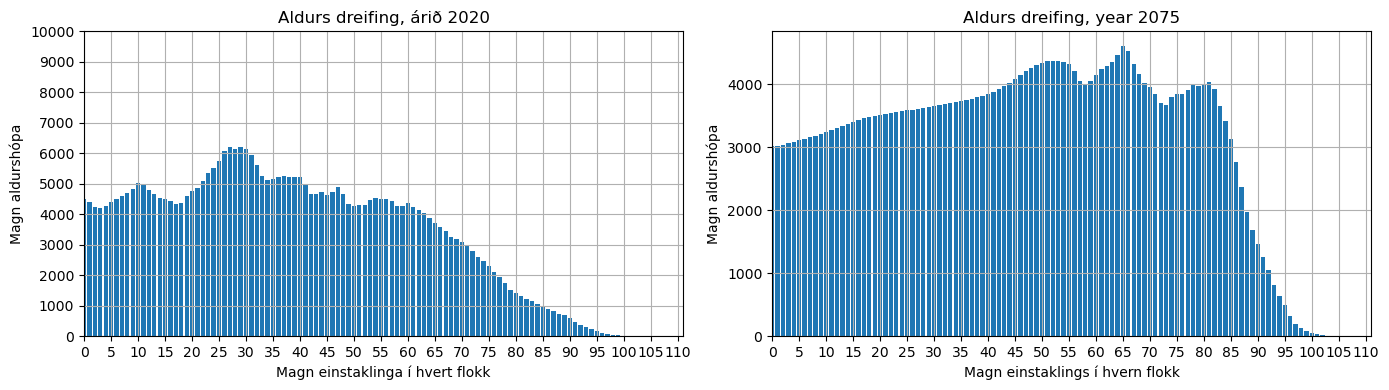

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title('Aldurs dreifing, árið 2020')
plt.xlabel('Magn einstaklinga í hvert flokk')
plt.ylabel('Magn aldurshópa')
plt.xlim(0,111)
plt.ylim(0,10000)
plt.xticks(range(0,111,5))
plt.yticks(range(0,11000,1000))
plt.bar(list(range(111)),number)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Aldurs dreifing, year 2075')
plt.xlabel('Magn einstaklings í hvern flokk')
plt.ylabel('Magn aldurshópa')
plt.xlim(0,111)
plt.xticks(range(0,111,5))
plt.yticks(range(0,11000,1000))
plt.bar(list(range(111)),summa)
plt.grid(True)
plt.tight_layout()
plt.show()

## Lausn 34.4

In [16]:
def totalsumm(year, totalamount):
    for i in range(year):
        s = totalim * totalamount.sum()
        totalamount = fylki@totalamount+s
    return totalamount

list4matplot1 = []

print('Ár\tFjöldi')
for i in range(0, 56):
    summa2 = sum(totalsumm(i,(number+totalim)))
    list4matplot1.append(summa2)
    if i%5==0:
        print(str(i+2020).ljust(7), int(summa2.sum()))

Ár	Fjöldi
2020    366517
2025    404946
2030    447139
2035    492090
2040    539603
2045    589813
2050    643294
2055    701110
2060    763977
2065    831800
2070    904090
2075    980591


## Lausn 34.5

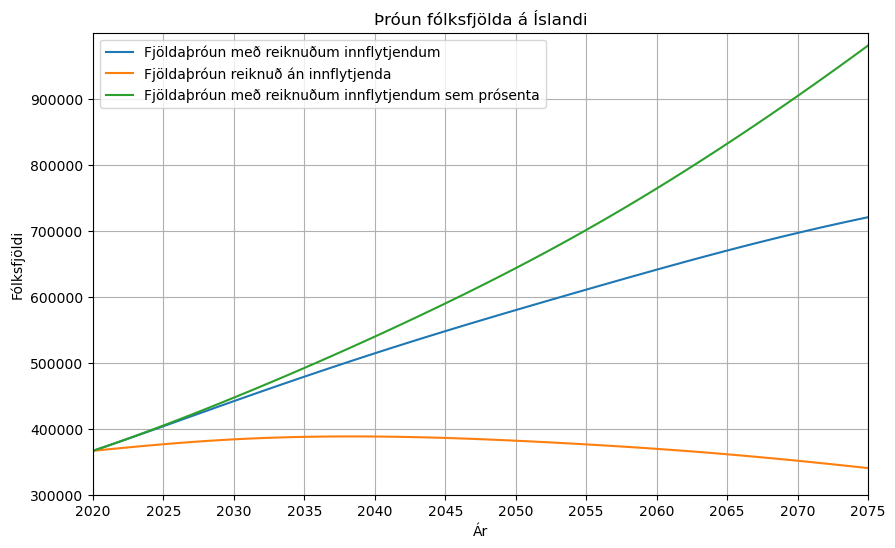

In [17]:
plt.figure(figsize=(10,6))
plt.title('Þróun fólksfjölda á Íslandi')
plt.xlabel('Ár')
plt.ylabel('Fólksfjöldi')
plt.ylim(300000,1000000)
plt.yticks(np.arange(300000,900001, 100000))
plt.xlim(2020,2075)
plt.xticks(np.arange(2020, 2076,5))
plt.plot(list(range(2020,2076)),list4matplot,label='Fjöldaþróun með reiknuðum innflytjendum')
plt.plot(list(range(2020,2076)),list4matplot0,label='Fjöldaþróun reiknuð án innflytjenda')
plt.plot(list(range(2020,2076)),list4matplot1, label='Fjöldaþróun með reiknuðum innflytjendum sem prósenta')
plt.legend()
plt.grid(True)
plt.show()